In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import os

In [3]:
tf.__version__

'2.8.0'

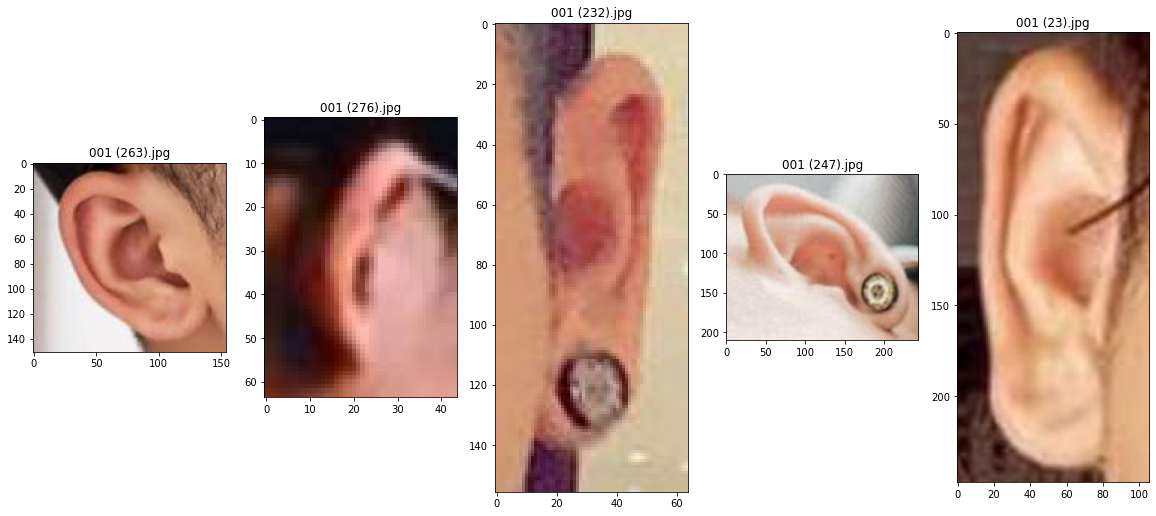

In [4]:
plt.figure(figsize=(20,20))
test_folder="../../Dataset/EarVN1.0 dataset/split_dataset/train/001.ALI_HD/"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
CATE_DATASET_PATH = "../../Dataset/EarVN1.0 dataset/split_dataset/train/"
categories = os.listdir(CATE_DATASET_PATH)
print(len(categories))

164


In [6]:
import pandas as pd

def get_data_info(path):
    categories = os.listdir(path)
    df_categories = []
    df_categories_image_number = []
    for cate in categories:
        df_categories.append(cate)
        image_num = len(os.listdir(os.path.join(path, cate)))
        df_categories_image_number.append(image_num)
        
    df = pd.DataFrame()
    df["category"] = df_categories
    df["image_num"] = df_categories_image_number
    return df

In [7]:
info = get_data_info(CATE_DATASET_PATH)
info

,category,image_num
0,016.Dang_L,133
1,015.Dan_Trg,164
2,094.Tuan_Hu,134
3,022.Duy_Kh,162
4,119.Kim_Ph,126
...,...,...
159,002.LeDuong_BL,239
160,075.Rym,132
161,122.La_Thanh_H,127
162,081.Thanh_D,137


In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(100, 200))
ax = sns.barplot(x="image_num", y="category", data=info)

In [9]:
info.max()

category     164.Yen_Nhi_H
image_num              239
dtype: object

In [10]:
info.min()

category     001.ALI_HD
image_num            90
dtype: object

In [11]:
MAX = 600
cate_not_max = info[info['image_num'] < MAX]['category']

In [12]:
cate_not_max

0          016.Dang_L
1         015.Dan_Trg
2         094.Tuan_Hu
3          022.Duy_Kh
4          119.Kim_Ph
            ...      
159    002.LeDuong_BL
160           075.Rym
161    122.La_Thanh_H
162       081.Thanh_D
163    029.Ho_Trung_D
Name: category, Length: 164, dtype: object

In [13]:
from skimage import io, exposure
from skimage.transform import rotate
from skimage.util import random_noise
import scipy.ndimage as ndi
from skimage.exposure import adjust_gamma
from skimage import img_as_ubyte
import numpy as np

# random rotation
# blur 20%
# Gaussian noise
# brightness
# flipped horizontally

def augment(image_path):
    img = io.imread(image_path)
    
    #rotation (-15, 15)
    rotate(img, random.randint(-15,15), mode="edge")
    
    if random.uniform(0, 1) < 0.2:
        alpha = random.randint(0,5)
        img = ndi.uniform_filter(img, size=(alpha, alpha, 1))
    
    var_noise = random.randint(1,5) * 0.0001
    img = random_noise(img, var=var_noise)
    
    brightness_param = random.uniform(0.8, 1.3)
    img = adjust_gamma(img, brightness_param)
    
    if random.uniform(0, 1) < 0.5:
        img= np.fliplr(img)
    
    return img
    

In [14]:
%%capture
from tqdm import tqdm_notebook as tqdm
import time
tqdm().pandas()

In [15]:
AUG_DATASET_PATH = "../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/"

with tqdm(total=len(cate_not_max), desc ="Augmentation") as pbar:
    for cate in cate_not_max:
        path = os.path.join(CATE_DATASET_PATH, cate)
        img_num = info[info['category'] == cate]['image_num'].values[0]
        # need_fill = MAX - img_num
        
        # print(MAX)
        
        # breakx
        print(path)
        for idx in range(img_num + 1, MAX + 1):
            print(idx, MAX)
            image_name = random.choice(os.listdir(path))
            image_path = os.path.join(CATE_DATASET_PATH, cate, image_name)
            image_aug = augment(image_path)

            image_aug_name = cate[0:3] + " " + "(" + str(idx) + ")" + ".jpg"

            image_aug_path = os.path.join(AUG_DATASET_PATH, cate, image_aug_name)
            io.imsave(image_aug_path, img_as_ubyte(image_aug))
        
        pbar.update(1)
        

/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=len(cate_not_max), desc ="Augmentation") as pbar:


Augmentation:   0%|          | 0/164 [00:00<?, ?it/s]

../../Dataset/EarVN1.0 dataset/split_dataset/train/016.Dang_L
134 600
135 600
136 600
137 600
138 600
139 600
140 600
141 600
142 600
143 600
144 600
145 600
146 600
147 600
148 600
149 600
150 600
151 600
152 600
153 600
154 600
155 600
156 600
157 600
158 600
159 600
160 600
161 600
162 600
163 600
164 600
165 600
166 600
167 600
168 600
169 600
170 600
171 600
172 600
173 600
174 600
175 600
176 600
177 600
178 600
179 600
180 600
181 600
182 600
183 600
184 600
185 600
186 600
187 600
188 600
189 600
190 600
191 600
192 600
193 600
194 600
195 600
196 600
197 600
198 600
199 600
200 600
201 600
202 600
203 600
204 600
205 600
206 600
207 600
208 600
209 600
210 600
211 600
212 600
213 600
214 600
215 600
216 600
217 600
218 600
219 600
220 600
221 600
222 600
223 600
224 600
225 600
226 600
227 600
228 600
229 600
230 600
231 600
232 600
233 600
234 600
235 600
236 600
237 600
238 600
239 600
240 600
241 600
242 600
243 600
244 600
245 600
246 600
247 600
248 600
249 600
250 600
25

/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/089.Trong_Hie/089 (600).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


142 600
143 600
144 600
145 600
146 600
147 600
148 600
149 600
150 600
151 600
152 600
153 600
154 600
155 600
156 600
157 600
158 600
159 600
160 600
161 600
162 600
163 600
164 600
165 600
166 600
167 600
168 600
169 600
170 600
171 600
172 600
173 600
174 600
175 600
176 600
177 600
178 600
179 600
180 600
181 600
182 600
183 600
184 600
185 600
186 600
187 600
188 600
189 600
190 600
191 600
192 600
193 600
194 600
195 600
196 600
197 600
198 600
199 600
200 600
201 600
202 600
203 600
204 600
205 600
206 600
207 600
208 600
209 600
210 600
211 600
212 600
213 600
214 600
215 600
216 600
217 600
218 600
219 600
220 600
221 600
222 600
223 600
224 600
225 600
226 600
227 600
228 600
229 600
230 600
231 600
232 600
233 600
234 600
235 600
236 600
237 600
238 600
239 600
240 600
241 600
242 600
243 600
244 600
245 600
246 600
247 600
248 600
249 600
250 600
251 600
252 600
253 600
254 600
255 600
256 600
257 600
258 600
259 600
260 600
261 600
262 600
263 600
264 600
265 600
266 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/004.Binz/004 (254).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


257 600
258 600
259 600
260 600
261 600
262 600
263 600
264 600
265 600
266 600
267 600
268 600
269 600
270 600
271 600
272 600
273 600
274 600
275 600
276 600
277 600
278 600
279 600
280 600
281 600
282 600
283 600
284 600
285 600
286 600
287 600
288 600
289 600
290 600
291 600
292 600
293 600
294 600
295 600
296 600
297 600
298 600
299 600
300 600
301 600
302 600
303 600
304 600
305 600
306 600
307 600
308 600
309 600
310 600
311 600
312 600
313 600
314 600
315 600
316 600
317 600
318 600
319 600
320 600
321 600
322 600
323 600
324 600
325 600
326 600
327 600
328 600
329 600
330 600
331 600
332 600
333 600
334 600
335 600
336 600
337 600
338 600
339 600
340 600
341 600
342 600
343 600
344 600
345 600
346 600
347 600
348 600
349 600
350 600
351 600
352 600
353 600
354 600
355 600
356 600
357 600
358 600
359 600
360 600
361 600
362 600
363 600
364 600
365 600
366 600
367 600
368 600
369 600
370 600
371 600
372 600
373 600
374 600
375 600
376 600
377 600
378 600
379 600
380 600
381 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/025.Ha_Anh_T/025 (204).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


223 600
224 600
225 600
226 600
227 600
228 600
229 600
230 600
231 600
232 600
233 600
234 600
235 600
236 600
237 600
238 600
239 600
240 600
241 600
242 600
243 600
244 600
245 600
246 600
247 600
248 600
249 600
250 600
251 600
252 600
253 600
254 600
255 600
256 600
257 600
258 600
259 600
260 600
261 600
262 600
263 600
264 600
265 600
266 600
267 600
268 600
269 600
270 600
271 600
272 600
273 600
274 600
275 600
276 600
277 600
278 600
279 600
280 600
281 600
282 600
283 600
284 600
285 600
286 600
287 600
288 600
289 600
290 600
291 600
292 600
293 600
294 600
295 600
296 600
297 600
298 600
299 600
300 600
301 600
302 600
303 600
304 600
305 600
306 600
307 600
308 600
309 600
310 600
311 600
312 600
313 600
314 600
315 600
316 600
317 600
318 600
319 600
320 600
321 600
322 600
323 600
324 600
325 600
326 600
327 600
328 600
329 600
330 600
331 600
332 600
333 600
334 600
335 600
336 600
337 600
338 600
339 600
340 600
341 600
342 600
343 600
344 600
345 600
346 600
347 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/025.Ha_Anh_T/025 (358).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


365 600
366 600
367 600
368 600
369 600
370 600
371 600
372 600
373 600
374 600
375 600
376 600
377 600
378 600
379 600
380 600
381 600
382 600
383 600
384 600
385 600
386 600
387 600
388 600
389 600
390 600
391 600
392 600
393 600
394 600
395 600
396 600
397 600
398 600
399 600
400 600
401 600
402 600
403 600
404 600
405 600
406 600
407 600
408 600
409 600
410 600
411 600
412 600
413 600
414 600
415 600
416 600
417 600
418 600
419 600
420 600
421 600
422 600
423 600
424 600
425 600
426 600
427 600
428 600
429 600
430 600
431 600
432 600
433 600
434 600
435 600
436 600
437 600
438 600
439 600
440 600
441 600
442 600
443 600
444 600
445 600
446 600
447 600
448 600
449 600
450 600
451 600
452 600
453 600
454 600
455 600
456 600
457 600
458 600
459 600
460 600
461 600
462 600
463 600
464 600
465 600
466 600
467 600
468 600
469 600
470 600
471 600
472 600
473 600
474 600
475 600
476 600
477 600
478 600
479 600
480 600
481 600
482 600
483 600
484 600
485 600
486 600
487 600
488 600
489 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/025.Ha_Anh_T/025 (540).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


548 600
549 600
550 600
551 600
552 600
553 600
554 600
555 600
556 600
557 600
558 600
559 600
560 600
561 600
562 600
563 600
564 600
565 600
566 600
567 600
568 600
569 600
570 600
571 600
572 600
573 600
574 600
575 600
576 600
577 600
578 600
579 600
580 600
581 600
582 600
583 600
584 600
585 600
586 600
587 600
588 600
589 600
590 600
591 600
592 600
593 600
594 600
595 600
596 600
597 600
598 600
599 600
600 600
../../Dataset/EarVN1.0 dataset/split_dataset/train/077.Soobin_HS
101 600
102 600
103 600
104 600
105 600
106 600
107 600
108 600
109 600
110 600
111 600
112 600
113 600
114 600
115 600
116 600
117 600
118 600
119 600
120 600
121 600
122 600
123 600
124 600
125 600
126 600
127 600
128 600
129 600
130 600
131 600
132 600
133 600
134 600
135 600
136 600
137 600
138 600
139 600
140 600
141 600
142 600
143 600
144 600
145 600
146 600
147 600
148 600
149 600
150 600
151 600
152 600
153 600
154 600
155 600
156 600
157 600
158 600
159 600
160 600
161 600
162 600
163 600
164 600

/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/005.Bui_AT/005 (234).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


235 600
236 600
237 600
238 600
239 600
240 600
241 600
242 600
243 600
244 600
245 600
246 600
247 600
248 600
249 600
250 600
251 600
252 600
253 600
254 600
255 600
256 600
257 600
258 600
259 600
260 600
261 600
262 600
263 600
264 600
265 600
266 600
267 600
268 600
269 600
270 600
271 600
272 600
273 600
274 600
275 600
276 600
277 600
278 600
279 600
280 600
281 600
282 600
283 600
284 600
285 600
286 600
287 600
288 600
289 600
290 600
291 600
292 600
293 600
294 600
295 600
296 600
297 600
298 600
299 600
300 600
301 600
302 600
303 600
304 600
305 600
306 600
307 600
308 600
309 600
310 600
311 600
312 600
313 600
314 600
315 600
316 600
317 600
318 600
319 600
320 600
321 600
322 600
323 600
324 600
325 600
326 600
327 600
328 600
329 600
330 600
331 600
332 600
333 600
334 600
335 600
336 600
337 600
338 600
339 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/005.Bui_AT/005 (327).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


340 600
341 600
342 600
343 600
344 600
345 600
346 600
347 600
348 600
349 600
350 600
351 600
352 600
353 600
354 600
355 600
356 600
357 600
358 600
359 600
360 600
361 600
362 600
363 600
364 600
365 600
366 600
367 600
368 600
369 600
370 600
371 600
372 600
373 600
374 600
375 600
376 600
377 600
378 600
379 600
380 600
381 600
382 600
383 600
384 600
385 600
386 600
387 600
388 600
389 600
390 600
391 600
392 600
393 600
394 600
395 600
396 600
397 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/005.Bui_AT/005 (396).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


398 600
399 600
400 600
401 600
402 600
403 600
404 600
405 600
406 600
407 600
408 600
409 600
410 600
411 600
412 600
413 600
414 600
415 600
416 600
417 600
418 600
419 600
420 600
421 600
422 600
423 600
424 600
425 600
426 600
427 600
428 600
429 600
430 600
431 600
432 600
433 600
434 600
435 600
436 600
437 600
438 600
439 600
440 600
441 600
442 600
443 600
444 600
445 600
446 600
447 600
448 600
449 600
450 600
451 600
452 600
453 600
454 600
455 600
456 600
457 600
458 600
459 600
460 600
461 600
462 600
463 600
464 600
465 600
466 600
467 600
468 600
469 600
470 600
471 600
472 600
473 600
474 600
475 600
476 600
477 600
478 600
479 600
480 600
481 600
482 600
483 600
484 600
485 600
486 600
487 600
488 600
489 600
490 600
491 600
492 600
493 600
494 600
495 600
496 600
497 600
498 600
499 600
500 600
501 600
502 600
503 600
504 600
505 600
506 600
507 600
508 600
509 600
510 600
511 600
512 600
513 600
514 600
515 600
516 600
517 600
518 600
519 600
520 600
521 600
522 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/164.Yen_Nhi_H/164 (137).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


140 600
141 600
142 600
143 600
144 600
145 600
146 600
147 600
148 600
149 600
150 600
151 600
152 600
153 600
154 600
155 600
156 600
157 600
158 600
159 600
160 600
161 600
162 600
163 600
164 600
165 600
166 600
167 600
168 600
169 600
170 600
171 600
172 600
173 600
174 600
175 600
176 600
177 600
178 600
179 600
180 600
181 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/164.Yen_Nhi_H/164 (168).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


182 600
183 600
184 600
185 600
186 600
187 600
188 600
189 600
190 600
191 600
192 600
193 600
194 600
195 600
196 600
197 600
198 600
199 600
200 600
201 600
202 600
203 600
204 600
205 600
206 600
207 600
208 600
209 600
210 600
211 600
212 600
213 600
214 600
215 600
216 600
217 600
218 600
219 600
220 600
221 600
222 600
223 600
224 600
225 600
226 600
227 600
228 600
229 600
230 600
231 600
232 600
233 600
234 600
235 600
236 600
237 600
238 600
239 600
240 600
241 600
242 600
243 600
244 600
245 600
246 600
247 600
248 600
249 600
250 600
251 600
252 600
253 600
254 600
255 600
256 600
257 600
258 600
259 600
260 600
261 600
262 600
263 600
264 600
265 600
266 600
267 600
268 600
269 600
270 600
271 600
272 600
273 600
274 600
275 600
276 600
277 600
278 600
279 600
280 600
281 600
282 600
283 600
284 600
285 600
286 600
287 600
288 600
289 600
290 600
291 600
292 600
293 600
294 600
295 600
296 600
297 600
298 600
299 600
300 600
301 600
302 600
303 600
304 600
305 600
306 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/164.Yen_Nhi_H/164 (333).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


335 600
336 600
337 600
338 600
339 600
340 600
341 600
342 600
343 600
344 600
345 600
346 600
347 600
348 600
349 600
350 600
351 600
352 600
353 600
354 600
355 600
356 600
357 600
358 600
359 600
360 600
361 600
362 600
363 600
364 600
365 600
366 600
367 600
368 600
369 600
370 600
371 600
372 600
373 600
374 600
375 600
376 600
377 600
378 600
379 600
380 600
381 600
382 600
383 600
384 600
385 600
386 600
387 600
388 600
389 600
390 600
391 600
392 600
393 600
394 600
395 600
396 600
397 600
398 600
399 600
400 600
401 600
402 600
403 600
404 600
405 600
406 600
407 600
408 600
409 600
410 600
411 600
412 600
413 600
414 600
415 600
416 600
417 600
418 600
419 600
420 600
421 600
422 600
423 600
424 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/164.Yen_Nhi_H/164 (411).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))
/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/164.Yen_Nhi_H/164 (418).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


425 600
426 600
427 600
428 600
429 600
430 600
431 600
432 600
433 600
434 600
435 600
436 600
437 600
438 600
439 600
440 600
441 600
442 600
443 600
444 600
445 600
446 600
447 600
448 600
449 600
450 600
451 600
452 600
453 600
454 600
455 600
456 600
457 600
458 600
459 600
460 600
461 600
462 600
463 600
464 600
465 600
466 600
467 600
468 600
469 600
470 600
471 600
472 600
473 600
474 600
475 600
476 600
477 600
478 600
479 600
480 600
481 600
482 600
483 600
484 600
485 600
486 600
487 600
488 600
489 600
490 600
491 600
492 600
493 600
494 600
495 600
496 600
497 600
498 600
499 600
500 600
501 600
502 600
503 600
504 600
505 600
506 600
507 600
508 600
509 600
510 600
511 600
512 600
513 600
514 600
515 600
516 600
517 600
518 600
519 600
520 600
521 600
522 600
523 600
524 600
525 600
526 600
527 600
528 600
529 600
530 600
531 600
532 600
533 600
534 600
535 600
536 600
537 600
538 600
539 600
540 600
541 600
542 600
543 600
544 600
545 600
546 600
547 600
548 600
549 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/134.Minh_Tr/134 (272).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


274 600
275 600
276 600
277 600
278 600
279 600
280 600
281 600
282 600
283 600
284 600
285 600
286 600
287 600
288 600
289 600
290 600
291 600
292 600
293 600
294 600
295 600
296 600
297 600
298 600
299 600
300 600
301 600
302 600
303 600
304 600
305 600
306 600
307 600
308 600
309 600
310 600
311 600
312 600
313 600
314 600
315 600
316 600
317 600
318 600
319 600
320 600
321 600
322 600
323 600
324 600
325 600
326 600
327 600
328 600
329 600
330 600
331 600
332 600
333 600
334 600
335 600
336 600
337 600
338 600
339 600
340 600
341 600
342 600
343 600
344 600
345 600
346 600
347 600
348 600
349 600
350 600
351 600
352 600
353 600
354 600
355 600
356 600
357 600
358 600
359 600
360 600
361 600
362 600
363 600
364 600
365 600
366 600
367 600
368 600
369 600
370 600
371 600
372 600
373 600
374 600
375 600
376 600
377 600
378 600
379 600
380 600
381 600
382 600
383 600
384 600
385 600
386 600
387 600
388 600
389 600
390 600
391 600
392 600
393 600
394 600
395 600
396 600
397 600
398 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/134.Minh_Tr/134 (422).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))
/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/134.Minh_Tr/134 (430).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


423 600
424 600
425 600
426 600
427 600
428 600
429 600
430 600
431 600
432 600
433 600
434 600
435 600
436 600
437 600
438 600
439 600
440 600
441 600
442 600
443 600
444 600
445 600
446 600
447 600
448 600
449 600
450 600
451 600
452 600
453 600
454 600
455 600
456 600
457 600
458 600
459 600
460 600
461 600
462 600
463 600
464 600
465 600
466 600
467 600
468 600
469 600
470 600
471 600
472 600
473 600
474 600
475 600
476 600
477 600
478 600
479 600
480 600
481 600
482 600
483 600
484 600
485 600
486 600
487 600
488 600
489 600
490 600
491 600
492 600
493 600
494 600
495 600
496 600
497 600
498 600
499 600
500 600
501 600
502 600
503 600
504 600
505 600
506 600
507 600
508 600
509 600
510 600
511 600
512 600
513 600
514 600
515 600
516 600
517 600
518 600
519 600
520 600
521 600
522 600
523 600
524 600
525 600
526 600
527 600
528 600
529 600
530 600
531 600
532 600
533 600
534 600
535 600
536 600
537 600
538 600
539 600
540 600
541 600
542 600
543 600
544 600
545 600
546 600
547 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/140.Nguyen_Thi_Tram/140 (279).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


283 600
284 600
285 600
286 600
287 600
288 600
289 600
290 600
291 600
292 600
293 600
294 600
295 600
296 600
297 600
298 600
299 600
300 600
301 600
302 600
303 600
304 600
305 600
306 600
307 600
308 600
309 600
310 600
311 600
312 600
313 600
314 600
315 600
316 600
317 600
318 600
319 600
320 600
321 600
322 600
323 600
324 600
325 600
326 600
327 600
328 600
329 600
330 600
331 600
332 600
333 600
334 600
335 600
336 600
337 600
338 600
339 600
340 600
341 600
342 600
343 600
344 600
345 600
346 600
347 600
348 600
349 600
350 600
351 600
352 600
353 600
354 600
355 600
356 600
357 600
358 600
359 600
360 600
361 600
362 600
363 600
364 600
365 600
366 600
367 600
368 600
369 600
370 600
371 600
372 600
373 600
374 600
375 600
376 600
377 600
378 600
379 600
380 600
381 600
382 600
383 600
384 600
385 600
386 600
387 600
388 600
389 600
390 600
391 600
392 600
393 600
394 600
395 600
396 600
397 600
398 600
399 600
400 600
401 600
402 600
403 600
404 600
405 600
406 600
407 600


/var/folders/vn/9_d7qkt54gs736gp7t57mtrm0000gn/T/ipykernel_17664/1823945675.py:22: UserWarning: ../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/075.Rym/075 (483).jpg is a low contrast image
  io.imsave(image_aug_path, img_as_ubyte(image_aug))


500 600
501 600
502 600
503 600
504 600
505 600
506 600
507 600
508 600
509 600
510 600
511 600
512 600
513 600
514 600
515 600
516 600
517 600
518 600
519 600
520 600
521 600
522 600
523 600
524 600
525 600
526 600
527 600
528 600
529 600
530 600
531 600
532 600
533 600
534 600
535 600
536 600
537 600
538 600
539 600
540 600
541 600
542 600
543 600
544 600
545 600
546 600
547 600
548 600
549 600
550 600
551 600
552 600
553 600
554 600
555 600
556 600
557 600
558 600
559 600
560 600
561 600
562 600
563 600
564 600
565 600
566 600
567 600
568 600
569 600
570 600
571 600
572 600
573 600
574 600
575 600
576 600
577 600
578 600
579 600
580 600
581 600
582 600
583 600
584 600
585 600
586 600
587 600
588 600
589 600
590 600
591 600
592 600
593 600
594 600
595 600
596 600
597 600
598 600
599 600
600 600
../../Dataset/EarVN1.0 dataset/split_dataset/train/122.La_Thanh_H
128 600
129 600
130 600
131 600
132 600
133 600
134 600
135 600
136 600
137 600
138 600
139 600
140 600
141 600
142 600
143 60

In [16]:
info = get_data_info(AUG_DATASET_PATH)
info

,category,image_num
0,016.Dang_L,575
1,015.Dan_Trg,569
2,094.Tuan_Hu,575
3,022.Duy_Kh,568
4,119.Kim_Ph,569
...,...,...
159,002.LeDuong_BL,548
160,075.Rym,578
161,122.La_Thanh_H,573
162,081.Thanh_D,575


In [17]:
info[info['category'] == '002.LeDuong_BL']['image_num'].values[0]

548